In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [171]:
df= pd.read_excel('measurements2.xlsx')

In [172]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [82]:
type(df.distance[0])

numpy.float64

In [83]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [84]:
MediaConsumos= df.groupby(['gas_type']).mean()

In [85]:
MediaConsumos

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
gas_type,,,,,,,,,
E10,21.096250,4.931250,43.506250,21.917197,10.11875,0.043750,0.100000,0.075000,39.6000
SP98,18.639912,4.899123,40.820175,21.938356,12.22807,0.100877,0.140351,0.087719,35.5625


In [ ]:
#¿que nos interesa?
#consumo por kilometro a la misma velocidad
#precio
#specialidades

In [134]:
e10= df[df.gas_type=='E10']
sp= df[df.gas_type=='SP98']
meane10=e10.mean()
meansp=sp.mean()

<ipython-input-134-d2b630972120>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meane10=e10.mean()
<ipython-input-134-d2b630972120>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meansp=sp.mean()


In [124]:
consumonormale10=(meane10.consume/meane10.speed)*40

In [125]:
consumonormalsp=(meansp.consume/meansp.speed)*40

In [126]:
print(consumonormale10)

4.533831346070967


In [127]:
print(consumonormalsp)

4.800687654453636


#### Primera conclusión:
A misma velocidad consume más el sp

In [129]:
consumonormaldiste10=(meane10.consume/meane10.distance)*1

In [132]:
consumonormaldistsp=(meansp.consume/meansp.distance)*1

In [133]:
print(consumonormaldiste10)
print(consumonormaldistsp)

0.23375007406529597
0.26282971364032093


### Segunda conclusión:
A misma distancia se consume más con sp

In [173]:
def limpieza(x):
    if x== 'SP98':
        return 1
    if x== 'E10':
        return 0
        

In [174]:
df.gas_type=df.gas_type.apply(limpieza)

In [175]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,0,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,1,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,1,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,1,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,1,1,0,0,NaN,NaN


In [176]:
corr=df.corr()

In [177]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1') 
 .set_precision(2))

<ipython-input-177-2f759844c1a2>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
distance,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
consume,-0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan
speed,0.56,-0.23,nan,nan,nan,nan,nan,nan,nan,nan
temp_inside,0.08,-0.16,0.06,nan,nan,nan,nan,nan,nan,nan
temp_outside,0.09,-0.32,0.02,0.36,nan,nan,nan,nan,nan,nan
gas_type,-0.05,-0.02,-0.10,0.01,0.15,nan,nan,nan,nan,nan
AC,-0.03,0.10,-0.04,0.30,0.17,0.11,nan,nan,nan,nan
rain,-0.02,0.25,0.01,-0.04,-0.19,0.06,0.24,nan,nan,nan
sun,0.08,-0.17,0.08,0.25,0.35,0.02,0.09,-0.11,nan,nan
refill liters,0.13,0.10,0.05,0.03,-0.08,-0.24,nan,-0.49,nan,nan


No enseña correlación entre consume y gas type

#### Siguiente paso
Enriquecer datos con el precio de la gasolina. Aquí vamos a hacer la suposición, de que los dos tipos de gasolina que se muertan con sin plomo 98, uno siendo el estándar y el otro con ethanol 10.
Tras una extensiva búsqueda en internet he llegado a la conclusión de que no se puede hallar el precio de la e10 a día de hoy, pero cómo nos dicen que es más barata la e10, y es la que menos se consume, vamos a suponer que es más rentable económicamente la gasolina e10, dado que se consume menos con esta y  es más barata. Para hacer estas conclusiones más fiables, vamos a intentar igualar las condiciones de prueba, tomando una temperatura normalizada, y eliminando los datos que contengan factores especiales como lluvia o aire acondicionado.

In [179]:
df.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [180]:
df.AC.sum()

30

In [184]:
indexes = df[ df['AC'] == 1 ].index

In [185]:
df.drop(indexes, inplace=True)

In [186]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,0,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
380,8.3,5.0,52,24.5,27,NaN,1,0,0,0,NaN,NaN
381,5.5,3.7,33,24.5,28,sun,1,0,0,1,NaN,NaN
382,13.6,3.7,33,24.5,28,sun,1,0,0,1,NaN,NaN
383,16.0,3.7,39,24.5,18,NaN,1,0,0,0,NaN,NaN


In [181]:
df.sun.sum()

32

In [187]:
indexes2 = df[ df['sun'] == 1 ].index
df.drop(indexes2, inplace=True)

In [182]:
df.rain.sum()

48

In [188]:
indexes3 = df[ df['rain'] == 1 ].index
df.drop(indexes3, inplace=True)

In [189]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,0,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
375,11.9,3.7,33,25.0,19,NaN,1,0,0,0,NaN,NaN
376,14.5,4.3,36,25.0,22,NaN,1,0,0,0,NaN,NaN
380,8.3,5.0,52,24.5,27,NaN,1,0,0,0,NaN,NaN
383,16.0,3.7,39,24.5,18,NaN,1,0,0,0,NaN,NaN


In [190]:
e10= df[df.gas_type==0]
sp= df[df.gas_type==1]
meane10=e10.mean()
meansp=sp.mean()

<ipython-input-190-a1f77f071754>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meane10=e10.mean()
<ipython-input-190-a1f77f071754>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meansp=sp.mean()


In [200]:
diste10=(meane10.consume/meane10.distance)*1

In [201]:
distsp=(meansp.consume/meansp.distance)*1

In [202]:
print(diste10)
print(distsp)


0.2267600155581485
0.2768685499843636


In [221]:
data = {'TipoDeGasolina':['E10', 'SP98'],'ConsumoMismaDistancia': [diste10, distsp]}

In [222]:
dframe = pd.DataFrame(data)

In [232]:
dframe

,TipoDeGasolina,ConsumoMismaDistancia
0,E10,0.226760
1,SP98,0.276869


<AxesSubplot:xlabel='ConsumoMismaDistancia', ylabel='Count'>

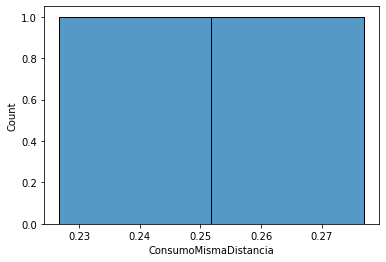

Por distancia sigue consumiendo más sp

In [194]:
speede10=(meane10.consume/meane10.speed)*1
speedsp=(meansp.consume/meansp.speed)*1
print(speede10)
print(speedsp)

0.11372583791452384
0.11946026986506746


Lo mismo por velocidad, aunque la diferencia parece reducirse

In [196]:
tempe10=(meane10.consume/meane10.temp_outside)*25
tempsp=(meansp.consume/meansp.temp_outside)*25
print(tempe10)
print(tempsp)

12.38030888030888
10.744336569579287


Aquí en cambio, vemos como el consumo de e10 se ve más afectado por una mayor temperatura que el sp.

In [207]:
totale10=(meane10.consume/(meane10.temp_outside*meane10.speed*meane10.distance))*1
totalsp=(meansp.consume/(meansp.temp_outside*meansp.speed*meansp.distance))*1

In [208]:
print(totale10)
print(totalsp)

0.0005328895532414408
0.0006021792113958752


#### Conclusion Final
En igualdad de condiciones en cuanto a temperatura fuera, velocidad, distancia y condiciones especiales, parece que se consume menos con e10. Es cierto, que la muestra es ciertamente pequeña, y el consumo se puede deber a muchas otras cosas como el coche y el tipo de motor, no solamente el tipo de gasolina, por lo que con estos datos concluir que el e10 resulta en un consumo menor resulta peligroso.